## Notebook Summary
This notebook includes the following activities:
1. Cleaning of three datasets, including CC, NZ, and UK. 
2. Renaming data columns such that common names across all three datasets, where appropriate.

In [35]:
import pathlib
from platform import python_version, architecture, platform

import pandas as pd
import numpy as np
import yellowbrick

In [60]:
def print_pkg_version(pkg):
    if callable(pkg):
        print(f'{" ".join(pkg.__name__.split("_"))}: {pkg()}')
    else:
        print(f'{pkg.__name__}: {pkg.__version__}')

In [61]:
for pki in [pd, np, yellowbrick, platform, python_version]:
    print_pkg_version(pki)

pandas: 0.25.1
numpy: 1.17.2
yellowbrick: 1.0
platform: Linux-5.0.0-23-generic-x86_64-with-debian-buster-sid
python version: 3.7.3


In [26]:
π = np.pi

In [2]:
raw_path = pathlib.Path('/home/madhatter106/PROJEX/DATASCIENCEPROJECTS/beaching/RAW_DATA')

In [27]:
df_cc.insert()

2

In [22]:
def dataloader(path_, **pdkw):
    df = None
    try:
        df = pd.read_csv(path_, **pdkw)
    except FileNotFoundError:
        print(f'{path_.stem} not found')
    finally:
        return df

def encode_cyclical_month(df, col_to_encode, new_col='month', cycle_max=12):
    df.insert(df.columns.get_loc(col_to_encode), f'{new_col}', )

In [94]:
df_cc = dataloader(raw_path / 'CC IFAW Mass Stranding Data 1999-2014.csv', 
                   parse_dates=['REPORT_DATE']).dropna(how='all').dropna(subset=['REPORT_DATE'])

### Description of some CC columns from data description file:

REPORT_DATE      - Date when stranding reported, yyyy-mm-dd<br>
COMMENTS         - Free text comments regarding the stranding event.  Unused in analysis.<br>
MASS_STRAND_NUM  - Text identifier unique to a mass stranding event.  MS##-##<br>
CONDITION_CODE   - Number indicating the condition of the animal: 1-Live Stranding, 2-Fresh Dead, >=3-Decomposed<br>
SPECIES          - Species of animal.<br>
LATITUDE_DEGREE  - Latitude of stranding location.  Units: degrees.  ##.#######<br>
LONGITUDE_DEGREE - Longitude of stranding location.  Units: degrees.  ##.#######<br>
Corrected Latitude - Corrected LATITUDE_DEGREE data.<br>
Corrected Longitude - Corrected LONGITUDE_DEGREE data.<br>a

In [98]:
df_cc.CCSN_NUM.unique().size

924

In [100]:
df_cc.MASS_STRAND_NUM.unique().size

165

In [101]:
df_cc.REPORT_DATE.unique().size

164

In [120]:
df_cc.NUM_ANIMALS_UNITS.value_counts()

Actual      906
actual       12
Estimate      1
Name: NUM_ANIMALS_UNITS, dtype: int64

In [97]:
df_cc.head(3).

,0,1,2
CCSN_NUM,CCSN99-046,CCSN99-049,CCSN99-051
REPORT_DATE,1999-03-07 00:00:00,1999-03-07 00:00:00,1999-03-07 00:00:00
COMMENTS,"Animal stranded alive with 5 others, animal se...",Red tag # 64; Found dead 03-09-99. Animal swa...,Found dead later on 03-07-99. Animal not foun...
MASS_STRAND_NUM,MS99-01,MS99-01,MS99-01
SERIES_NUM,NaN,NaN,NaN
CONDITION_CODE,1,1,1
RESTRAND_YN,0,0,0
GROUP_EVENT_YN,0,0,0
COW_CALF_YN,0,0,0
MASS_STRANDING_YN,0,0,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


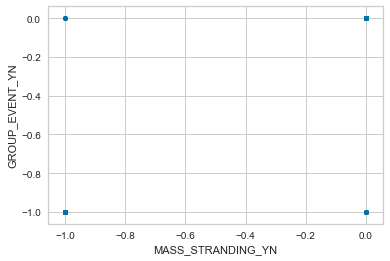

In [119]:
df_cc.plot(x='MASS_STRANDING_YN', y='GROUP_EVENT_YN', kind='scatter')

In [102]:
df_cc.RESTRAND_YN.value_counts()

 0.0    899
-1.0     25
Name: RESTRAND_YN, dtype: int64

In [103]:
df_cc.GROUP_EVENT_YN.value_counts()

 0.0    624
-1.0    300
Name: GROUP_EVENT_YN, dtype: int64

In [107]:
df_cc.COW_CALF_YN.value_counts()

 0.0    920
-1.0      4
Name: COW_CALF_YN, dtype: int64

In [109]:
df_cc.MASS_STRANDING_YN.value_counts()

 0.0    631
-1.0    293
Name: MASS_STRANDING_YN, dtype: int64

In [121]:
df_cc.LOCATION.value_counts()

Wellfleet                           248
Brewster                             58
Chapin Beach                         55
Eastham                              44
Great Island                         23
                                   ... 
Hardings Beach (near lighthouse)      1
Cooks Brook Beach                     1
Shore Rd.                             1
Crow's Pasture                        1
Seacamps Beach                        1
Name: LOCATION, Length: 169, dtype: int64

In [122]:
df_cc.TOWN.value_counts()

Wellfleet          539
Brewster           119
Dennis              82
Eastham             71
Barnstable          35
Orleans             30
Provincetown        20
Truro                7
Naushon Island       4
Sandwich             3
Chatham              2
Bourne               2
Cummaquid            2
Fairhaven            2
Pocasset             2
Yarmouth             1
Buzzards Bay         1
Marion               1
South Wellfleet      1
Name: TOWN, dtype: int64

In [ ]:
drop_columns = ['COMMENTS', 'SERIES_NUM' ,'LOCATION_DETAIL', 'NUM_ANIMAL_UNITS',
           'EXAM_DATE', 'EXAM_COND_ID', 'LOCATION']

In [126]:
df_cc.loc[df_cc.LOCATION.isnull(), 'TOWN']

43    Brewster
Name: TOWN, dtype: object

In [131]:
df_cc.loc[df_cc.TOWN=='Brewster', ['LOCATION']].T

,43,47,51,58,59,60,94,95,187,208,...,841,842,844,846,894,895,896,897,915,916
LOCATION,NaN,Payne Creek Beach,Robbins Hill Road,Paine's Creek then Rock Harbor,Robbin's Hill Beach,Paine's Creek then Boat Meadow Creek,Ellis Landing,Ellis Landing,Robins Hill Beach,Ellis Landing,...,Brewster,Brewster,Brewster,Brewster,Brewster,Brewster,Brewster,Brewster,Brewster,Brewster


In [132]:
df_cc.loc[((df_cc.TOWN=='Brewster')&(df_cc.LOCATION=='Brewster'))]

,CCSN_NUM,REPORT_DATE,COMMENTS,MASS_STRAND_NUM,SERIES_NUM,CONDITION_CODE,RESTRAND_YN,GROUP_EVENT_YN,COW_CALF_YN,MASS_STRANDING_YN,...,TOWN,LATITUDE_DEGREE,LONGITUDE_DEGREE,LAT_ACTUAL,LON_ACTUAL,LAT_ACHIEVED,LOCATION_DETAIL,SPECIES,Corrected Latitude,Corrected Longitude
589,IFAW10-135La,2010-04-10,stranded alone on outgoing tide early in day;...,MS10-12,Series0046,1.0,0.0,0.0,0.0,0.0,...,Brewster,4.177613e+01,7.007222e+01,NaN,NaN,NaN,Point of Rocks,Lagenorhynchus acutus,41.776133,-70.07221667
593,IFAW10-193La,2010-10-02,-fresh dead dolphin observed on beach with min...,MS10-14,NaN,2.0,0.0,0.0,0.0,0.0,...,Brewster,4.177780e+01,7.004892e+01,NaN,NaN,NaN,between Ocean Edge and Sea Camps,Lagenorhynchus acutus,41.777800,-70.04891667
596,IFAW10-221Dd,2010-11-12,Fresh dead common dolphin calf observed 11/12....,MS10-15,Series0049,2.0,0.0,0.0,0.0,0.0,...,Brewster,4.178178e+01,7.003935e+01,NaN,NaN,NaN,Linnell Landing,Delphinus delphis,41.781783,-70.03935
597,IFAW10-230Dd,2010-11-29,-live Dd observed stranded in tidal sand flats...,MS10-16,Series0050,1.0,0.0,0.0,0.0,0.0,...,Brewster,4.177417e+01,7.007850e+01,NaN,NaN,NaN,Point of Rocks,Delphinus delphis,41.774167,-70.0785
642,IFAW11-293Dd,2011-11-29,-dolphin was part of 7 animal mass stranding t...,MS11-12,NaN,2.0,0.0,-1.0,0.0,-1.0,...,Brewster,4.176910e+01,-7.008680e+01,Estimate,Estimate,Other,Breakwater Beach,Delphinus delphis,41.769100,-70.0868
643,IFAW11-297Dd,2011-11-29,Initally reported on 11/29/11 in a group of 7 ...,MS11-12,NaN,2.0,0.0,-1.0,0.0,0.0,...,Brewster,4.177370e+01,7.006242e+01,Actual,Actual,GPS,West of Ellis Landing,Delphinus delphis,41.773700,-70.06242
644,IFAW11-296Dd,2011-11-29,-dolphin was part of 7 animal mass stranding t...,MS11-12,NaN,2.0,0.0,-1.0,0.0,-1.0,...,Brewster,4.176910e+01,-7.008680e+01,Estimate,Estimate,Other,Breakwater Beach,Delphinus delphis,41.769100,-70.0868
645,IFAW11-295Dd,2011-11-29,"Reported dead in a group of 7, photos were ta...",MS11-12,NaN,2.0,0.0,-1.0,0.0,0.0,...,Brewster,4.176910e+01,7.008680e+01,Actual,Actual,GPS,Breakwater,Delphinus delphis,41.769100,-70.0868
646,IFAW11-291Dd,2011-11-29,-dolphin was part of 7 animal mass stranding t...,MS11-12,NaN,2.0,0.0,-1.0,0.0,-1.0,...,Brewster,4.176910e+01,-7.008680e+01,Estimate,Estimate,Other,Breakwater Beach,Delphinus delphis,41.769100,-70.0868
647,IFAW11-292Dd,2011-11-29,-dolphin was part of 7 animal mass stranding t...,MS11-12,NaN,2.0,0.0,-1.0,0.0,-1.0,...,Brewster,4.176910e+01,-7.008680e+01,Estimate,Estimate,Other,Breakwater Beach,Delphinus delphis,41.769100,-70.0868


In [96]:
df_cc.drop(drop_columns, axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 0 to 923
Data columns (total 25 columns):
CCSN_NUM               924 non-null object
REPORT_DATE            924 non-null datetime64[ns]
COMMENTS               890 non-null object
MASS_STRAND_NUM        924 non-null object
SERIES_NUM             517 non-null object
CONDITION_CODE         924 non-null float64
RESTRAND_YN            924 non-null float64
GROUP_EVENT_YN         924 non-null float64
COW_CALF_YN            924 non-null float64
MASS_STRANDING_YN      924 non-null float64
NUM_ANIMALS            924 non-null float64
NUM_ANIMALS_UNITS      919 non-null object
EXAM_DATE              301 non-null object
EXAM_COND_ID           304 non-null float64
LOCATION               923 non-null object
TOWN                   924 non-null object
LATITUDE_DEGREE        924 non-null float64
LONGITUDE_DEGREE       924 non-null float64
LAT_ACTUAL             323 non-null object
LON_ACTUAL             322 non-null object
LAT_ACHIEVED      

In [95]:
df_cc.describe().T

,count,mean,std,min,25%,50%,75%,max
CONDITION_CODE,924.0,1.615801,0.842152,1.000000,1.000000,1.000000,2.000000,6.000000e+00
RESTRAND_YN,924.0,-0.027056,0.162335,-1.000000,0.000000,0.000000,0.000000,0.000000e+00
GROUP_EVENT_YN,924.0,-0.324675,0.468507,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00
COW_CALF_YN,924.0,-0.004329,0.065688,-1.000000,0.000000,0.000000,0.000000,0.000000e+00
MASS_STRANDING_YN,924.0,-0.317100,0.465599,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00
NUM_ANIMALS,924.0,4.033550,5.583985,1.000000,1.000000,1.000000,4.000000,2.200000e+01
EXAM_COND_ID,304.0,1.753289,0.905605,1.000000,1.000000,1.000000,3.000000,4.000000e+00
LATITUDE_DEGREE,924.0,46754.552120,434355.171313,41.426333,41.779300,41.905300,41.928054,4.193193e+06
LONGITUDE_DEGREE,924.0,84941.550162,760761.034970,-70.479600,-70.012000,70.023267,70.068167,7.009782e+06
Corrected Latitude,924.0,41.865475,0.102754,41.426333,41.778692,41.901800,41.927808,4.248575e+01


In [91]:
df_nz = dataloader(raw_path / 'NZ DOC Mass Stranding Data 1990-2016.csv', 
                   parse_dates=['Date_']).dropna(how='all').dropna(subset=['Date_'])

In [92]:
df_uk = dataloader(raw_path / 'UK CSIP MSE data 1991-2015.csv')

In [93]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 30 columns):
Class                                  285 non-null object
Event                                  285 non-null object
Individuals/event                      285 non-null int64
National Reference                     285 non-null object
Species (scientific)                   285 non-null object
Species (common)                       285 non-null object
Species Uncertain                      285 non-null bool
Date Found                             285 non-null object
Date Certainty                         285 non-null object
Year                                   285 non-null int64
Location                               285 non-null object
Local Authority                        285 non-null object
Region                                 285 non-null object
Country                                285 non-null object
Grid Ref                               285 non-null object
Easting       

In [85]:
df_cc.dropna(subset=['REPORT_DATE'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 924 entries, 1999-03-07 to 2014-12-04
Data columns (total 24 columns):
CCSN_NUM               924 non-null object
COMMENTS               890 non-null object
MASS_STRAND_NUM        924 non-null object
SERIES_NUM             517 non-null object
CONDITION_CODE         924 non-null float64
RESTRAND_YN            924 non-null float64
GROUP_EVENT_YN         924 non-null float64
COW_CALF_YN            924 non-null float64
MASS_STRANDING_YN      924 non-null float64
NUM_ANIMALS            924 non-null float64
NUM_ANIMALS_UNITS      919 non-null object
EXAM_DATE              301 non-null object
EXAM_COND_ID           304 non-null float64
LOCATION               923 non-null object
TOWN                   924 non-null object
LATITUDE_DEGREE        924 non-null float64
LONGITUDE_DEGREE       924 non-null float64
LAT_ACTUAL             323 non-null object
LON_ACTUAL             322 non-null object
LAT_ACHIEVED           320 non-null object
LOCATIO

In [75]:
df_nz.head(2).T

,0,1
Strand_IDTest,1326,1329
Date_,1990-01-26 00:00:00,1990-01-31 00:00:00
Field_Species_ID,DELPHINUS DELPHIS,ZIPHIUS CAVIROSTRIS
Type,>1 individual unless mother and calf,>1 individual unless mother and calf
No_Strand,14,2
Region,chatham islands,chatham islands
Location_Desc,WAIKAREPI (BAY SOUTH OF RADIO STATION BEACH),"WAITANGI BEACH, SOUTH END"
Lat,-43.9616,-43.9525
Long,-176.581,-176.555
No_Refloat,0,0


In [80]:
df_nz.set_index('Date_').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 1990-01-26 to 2016-12-19
Data columns (total 16 columns):
Strand_IDTest       237 non-null int64
Field_Species_ID    237 non-null object
Type                237 non-null object
No_Strand           237 non-null int64
Region              237 non-null object
Location_Desc       236 non-null object
Lat                 231 non-null float64
Long                231 non-null float64
No_Refloat          208 non-null float64
No_Restrand         180 non-null float64
Comments_General    205 non-null object
Record_type         203 non-null object
Incident_type       219 non-null object
Cond_Animal         237 non-null object
Contrib_Fa          237 non-null object
Reformatted Date    237 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 31.5+ KB


In [64]:
df_cc.describe().T

,count,mean,std,min,25%,50%,75%,max
CONDITION_CODE,924.0,1.615801,0.842152,1.000000,1.000000,1.000000,2.000000,6.000000e+00
RESTRAND_YN,924.0,-0.027056,0.162335,-1.000000,0.000000,0.000000,0.000000,0.000000e+00
GROUP_EVENT_YN,924.0,-0.324675,0.468507,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00
COW_CALF_YN,924.0,-0.004329,0.065688,-1.000000,0.000000,0.000000,0.000000,0.000000e+00
MASS_STRANDING_YN,924.0,-0.317100,0.465599,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00
NUM_ANIMALS,924.0,4.033550,5.583985,1.000000,1.000000,1.000000,4.000000,2.200000e+01
EXAM_COND_ID,304.0,1.753289,0.905605,1.000000,1.000000,1.000000,3.000000,4.000000e+00
LATITUDE_DEGREE,924.0,46754.552120,434355.171313,41.426333,41.779300,41.905300,41.928054,4.193193e+06
LONGITUDE_DEGREE,924.0,84941.550162,760761.034970,-70.479600,-70.012000,70.023267,70.068167,7.009782e+06
Corrected Latitude,924.0,41.865475,0.102754,41.426333,41.778692,41.901800,41.927808,4.248575e+01


In [25]:
df_cc.head(2).T

,0,1
CCSN_NUM,CCSN99-046,CCSN99-049
REPORT_DATE,1999-03-07 00:00:00,1999-03-07 00:00:00
COMMENTS,"Animal stranded alive with 5 others, animal se...",Red tag # 64; Found dead 03-09-99. Animal swa...
MASS_STRAND_NUM,MS99-01,MS99-01
SERIES_NUM,NaN,NaN
CONDITION_CODE,1,1
RESTRAND_YN,0,0
GROUP_EVENT_YN,0,0
COW_CALF_YN,0,0
MASS_STRANDING_YN,0,0
